In [ ]:
#Import The Solar Flare Data Set Files
#change it according to your files location
labelFile="Data\\labels_1540_4classes_icmla_21.pck"
inputsFile="Data\\mvts_1540_icmla_21.pck"

In [ ]:

import pandas as pd
import pickle

import numpy as np



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from tabulate import tabulate

In [ ]:
def loadInputs(file_name):
        with open(file_name, 'rb') as fp:
            obj = pickle.load(fp)
        return obj

In [ ]:
#device = torch.device('cpu')
#print("Processing in :",device)

Sampled_inputs=loadInputs("mvts_1540_icmla_21.pck")
Sampled_labels=loadInputs("labels_1540_4classes_icmla_21.pck") 
trainData = Sampled_inputs
trainLabel = Sampled_labels
print("trainData.shape: ", trainData.shape)
print("trainLebel.shape: ", trainLabel.shape)
print("Classes/labels : ",np.unique(trainLabel))

trainData.shape:  (1540, 33, 60)
trainLebel.shape:  (1540,)
Classes/labels :  [0 1 2 3]


In [ ]:
#standardization/z normalization of the univaraite time series
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
npArrays=[]
for l in range(0, len(trainData)):
  trainData_std = sc.fit_transform(trainData[l])
  #trainData_std = trainData_std.astype(np.float64)
  #print(type(trainData_std[0][0]))
  npArrays.append(trainData_std)

print(type(npArrays))
arr = np.asarray(npArrays)
print(type(arr))
trainData=arr
print("trainData.shape: ",trainData.shape)
print(type(trainData))
print("trainLebel.shape: ",trainLabel.shape)
print(type(trainLabel))

<class 'list'>
<class 'numpy.ndarray'>
trainData.shape:  (1540, 33, 60)
<class 'numpy.ndarray'>
trainLebel.shape:  (1540,)
<class 'numpy.ndarray'>


In [ ]:
#Transposing trainData to shape:(1540, 60, 33)
trainDatatemp=np.empty([1540,60, 33])
n=len(trainData)
for l in range(0, n):
  temp=trainData[l]
  temp=temp.T
  trainDatatemp[l,:,:]=temp
  

trainData=trainDatatemp
print("Transposing trainData shape: ",trainData.shape)

Transposing trainData shape:  (1540, 60, 33)


In [ ]:
#Taking the first 25 parameters which are based parameters:(1540, 60, 25)
trainDatat1=np.empty([1540,60, 25])
n=len(trainData)
for l in range(0, n):
  temp=trainData[l,:,0:25]
  trainDatat1[l,:,:]=temp
  

trainData=trainDatat1
print("trainData shape: ",trainData.shape)

trainData shape:  (1540, 60, 25)


In [ ]:
#Dimensionality Reduction Train Step
#Calculating the mean for each MVTS column (25 parameters which are based parameters)
def Dimensionality_Reduction_Train(X_train):
 trainDatatmean=np.empty([862,25])
 n=len(X_train)
 for l in range(0, n):
  temp=X_train[l,:,:]
  #print(temp.shape)
  #print(temp.shape[0])
  #print(temp.shape[1])
  x=temp.mean(axis=0)
  #print("mean for mvts:",l,"is=",x)
  trainDatatmean[l]=x

 x_train=trainDatatmean
 print("trainDatatmean shape: ",trainDatatmean.shape)
 return x_train

In [ ]:
#Dimensionality Reduction Step
#Calculating the mean for each MVTS column (25 parameters which are based parameters)
def Dimensionality_Reduction_Test(X_test):
 testDatatmean=np.empty([462,25])
 n=len(X_test)
 for l in range(0, n):
  temp=X_test[l,:,:]
  #print(temp.shape)
  #print(temp.shape[0])
  #print(temp.shape[1])
  x=temp.mean(axis=0)
  #print("mean for mvts:",l,"is=",x)
  testDatatmean[l]=x

 x_test=testDatatmean
 print("trainDatatmean shape: ",testDatatmean.shape)
 return x_test

In [ ]:
#Dimensionality Reduction Step
#Calculating the mean for each MVTS column (25 parameters which are based parameters)
def Dimensionality_Reduction_Val(X_val):
 valDatatmean=np.empty([216,25])
 n=len(X_val)
 for l in range(0, n):
  temp=X_val[l,:,:]
  #print(temp.shape)
  #print(temp.shape[0])
  #print(temp.shape[1])
  x=temp.mean(axis=0)
  #print("mean for mvts:",l,"is=",x)
  valDatatmean[l]=x

 x_val=valDatatmean
 print("trainDatatmean shape: ",valDatatmean.shape)
 return x_val

In [ ]:
K1=[2]
K2=[2,20] 
K3=[2,16,20]
K4=[2,16,17,20]
K5=[2,7,16,17,20]
K6=[2,6,7,16,17,20]
K7=[2,6,7,12,16,17,20]
K8=[2,6,7,9,12 ,16,17, 20]
K9=[2,6,7, 9, 12,15,16,17, 20]
K10=[2,6,7, 9, 12,13, 15,16,17, 20]
K11=[2,6,7, 9,10,12,13, 15,16,17, 20]
K12=[2,6,7, 9,10,12,13, 15,16,17, 20, 24]
K13=[2,6,7,8,9,10,12,13, 15,16,17, 20, 24]
K14=[2,6,7,8,9,10,12,13,14,15,16,17, 20, 24]
K15=[2,6,7,8,9,10,12,13,14,15,16,17,18, 20, 24]
K16=[2,6,7,8,9,10,11,12,13,14,15,16,17,18, 20, 24]
K17=[2,3,6,7,8,9,10,11,12,13,14,15,16,17,18, 20, 24]
K18=[2,3,6,7,8,9,10,11,12,13,14,15,16,17,18, 20,21, 24]
K19=[2,3,6,7,8,9,10,11,12,13,14,15,16,17,18, 20,21,22, 24]
K20=[2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22, 24]
K21=[2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
K22=[2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
K23=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
K24=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
K25=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
 


 
 


In [ ]:
TopK=[K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11,K12,K13,K14,K15,K16,K17,K18,K19,K20,K21,K22,K23,K24,K25]

In [ ]:
TopK[1]

[2, 20]

In [ ]:
#XGBClassifier
def xgbclassif(Xtr,Xv,Xte,y_train, y_val,y_test):
 clf = xgb.XGBClassifier(objective="multi:softprob")
 clf.fit(Xtr, y_train)
 yv_pred=clf.predict(Xv)
 print("validation data results:")
 VScore=accuracy_score(y_val, yv_pred)
 print("Validation Accuracey",VScore)
 print(confusion_matrix(y_val, yv_pred))
 print(classification_report(y_val, yv_pred))
 y_pred=clf.predict(Xte)
 print("test data results:")
 TScore=accuracy_score(y_test, y_pred)
 print("Test Accuracey",TScore)
 print(confusion_matrix(y_test, y_pred))
 print(classification_report(y_test, y_pred))
 return VScore, TScore

In [ ]:
#SVMClassifier
def SVM1(Xtr,Xv,Xte,y_train, y_val,y_test):
 clf = svm.SVC()
 clf.fit(Xtr, y_train)
 yv_pred=clf.predict(Xv)
 print("validation data results:")
 VScore=accuracy_score(y_val, yv_pred)
 print("Validation Accuracey",VScore)
 print(confusion_matrix(y_val, yv_pred))
 print(classification_report(y_val, yv_pred))
 y_pred=clf.predict(Xte)
 print("test data results:")
 TScore=accuracy_score(y_test, y_pred)
 print("Test Accuracey",TScore)
 print(confusion_matrix(y_test, y_pred))
 print(classification_report(y_test, y_pred))
 return VScore, TScore

In [ ]:
#KNNClassifier
def knn(Xtr,Xv,Xte,y_train, y_val,y_test):
 clf = KNeighborsClassifier(n_neighbors=5)
 clf.fit(Xtr, y_train)
 yv_pred=clf.predict(Xv)
 print("validation data results:")
 VScore=accuracy_score(y_val, yv_pred)
 print("Validation Accuracey",VScore)
 print(confusion_matrix(y_val, yv_pred))
 print(classification_report(y_val, yv_pred))
 y_pred=clf.predict(Xte)
 print("test data results:")
 TScore=accuracy_score(y_test, y_pred)
 print("Test Accuracey",TScore)
 print(confusion_matrix(y_test, y_pred))
 print(classification_report(y_test, y_pred))
 return VScore, TScore

In [ ]:
#RandomForestClassifier
def RFtree(Xtr,Xv,Xte,y_train, y_val,y_test):
 clf = RandomForestClassifier()
 clf.fit(Xtr, y_train)
 yv_pred=clf.predict(Xv)
 print("validation data results:")
 VScore=accuracy_score(y_val, yv_pred)
 print("Validation Accuracey",VScore)
 print(confusion_matrix(y_val, yv_pred))
 print(classification_report(y_val, yv_pred))
 y_pred=clf.predict(Xte)
 print("test data results:")
 TScore=accuracy_score(y_test, y_pred)
 print("Test Accuracey",TScore)
 print(confusion_matrix(y_test, y_pred))
 print(classification_report(y_test, y_pred))
 return VScore, TScore

In [ ]:
#DecisionTreeClassifier
def DTree(Xtr,Xv,Xte,y_train, y_val,y_test):
 clf = DecisionTreeClassifier()
 clf.fit(Xtr, y_train)
 yv_pred=clf.predict(Xv)
 print("validation data results:")
 VScore=accuracy_score(y_val, yv_pred)
 print("Validation Accuracey",VScore)
 print(confusion_matrix(y_val, yv_pred))
 print(classification_report(y_val, yv_pred))
 y_pred=clf.predict(Xte)
 print("test data results:")
 TScore=accuracy_score(y_test, y_pred)
 print("Test Accuracey",TScore)
 print(confusion_matrix(y_test, y_pred))
 print(classification_report(y_test, y_pred))
 return VScore, TScore

In [ ]:
#https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b


In [ ]:
def start(TopK):
  validation_sizes=0.2
  # Stratify the data
  for r in range(0,5):
    print("Random_state: ", r)
    mvts_1540=trainData
    labels_1540=trainLabel
    X_train, X_test, y_train, y_test = train_test_split(mvts_1540, labels_1540, test_size=0.3, random_state=r, stratify=labels_1540)
    print("X_train.shape y_train.shape y_test.shape ",X_train.shape, y_train.shape)
    print("X_test.shape y_test.shape ",X_test.shape, y_test.shape)
    validation_size = validation_sizes
    print("\n\n\n *************** Validation Size is: ", validation_sizes,"of training size")
    print("after train validation split:")
    X_train, X_val,y_train, y_val= train_test_split(X_train,y_train, test_size=validation_size,random_state=r,stratify=y_train)
    #check percentage of examples
    print("X_train shape: ", X_train.shape)
    print("y_train shape: ", y_train.shape)
    print("X_test shape: ", X_test.shape)
    print("y_test shape: ", y_test.shape)
    print("X_val shape: ",X_val.shape) 
    print("y_val shape ",y_val.shape)

    unique_y_train, counts_y_train = np.unique(y_train, return_counts=True)
    y_train_stats = dict(zip(unique_y_train, counts_y_train))
    print("y_train_counts")
    print(y_train_stats)
    #270/(269+269+270+270) = 0.25
    unique_y_val, counts_y_val = np.unique(y_val, return_counts=True)
    y_val_stats = dict(zip(unique_y_val, counts_y_val))
    print("y_validation_counts")
    print(y_val_stats)

    unique_y_test, counts_y_test = np.unique(y_test, return_counts=True)
    y_test_stats = dict(zip(unique_y_test, counts_y_test))
    print("y_test_counts")
    print(y_test_stats)#116/(116+116+115+115) = 0.25
    for j in range(0,25):
            print("Results for Top K=",j)
            c=TopK[j]
            print(c)
            x_train=Dimensionality_Reduction_Train(X_train)
            x_test=Dimensionality_Reduction_Test(X_test)
            x_val=Dimensionality_Reduction_Val(X_val)
            Xtr=x_train[:,c]
            Xv=x_val[:,c]
            Xte=x_test[:,c]
            print("SVM classifier")
            Vsvmscore, Tsvmscore=SVM1(Xtr,Xv,Xte,y_train, y_val,y_test)
            print("KNN classifier")
            Vknnscore, Tknnscore= knn(Xtr,Xv,Xte,y_train, y_val,y_test)
            print("Desition Tree classifier") 
            Vdtscore, Tdtscore=DTree(Xtr,Xv,Xte,y_train, y_val,y_test)
            print("Random Forest classifier") 
            Vrfscore, Trfscore=RFtree(Xtr,Xv,Xte,y_train, y_val,y_test)
            print("XGBoost classifier")
            Vxgscore, Txgscore=xgbclassif(Xtr,Xv,Xte,y_train, y_val,y_test)
            print("Validation and Test Accuracey for Top K=",j)
            print(" Validation Accuracey for SVM, KNN,Desition Tree, Random Forest, and XGBoost classifiers are:","[",Vsvmscore,",",Vknnscore,",",Vdtscore,",",Vrfscore,",",Vxgscore,"]" )
            print(" Test Accuracey for SVM, KNN,Desition Tree, Random Forest, and XGBoost classifiers are:","[",Tsvmscore,",",Tknnscore,",",Tdtscore,",",Trfscore,",",Txgscore,"]" )
            ValidationSVMAcc.append(Vsvmscore)
            TestSVMAcc.append(Tsvmscore)
            ValidationKNNAcc.append(Vknnscore)
            TestKNNAcc.append(Tknnscore)
            ValidationDTAcc.append(Vdtscore)
            TestDTAcc.append(Tdtscore)
            ValidationRFAcc.append(Vrfscore)
            TestRFAcc.append(Trfscore)
            ValidationXGBoostAcc.append(Vxgscore)
            TestXGBoostAcc.append(Txgscore)
            


In [ ]:
ValidationSVMAcc=[]
TestSVMAcc=[]
ValidationKNNAcc=[]
TestKNNAcc=[]
ValidationDTAcc=[]
TestDTAcc=[]
ValidationRFAcc=[]
TestRFAcc=[]
ValidationXGBoostAcc=[]
TestXGBoostAcc=[]
start(TopK)

Streaming output truncated to the last 5000 lines.

XGBoost classifier
validation data results:
Validation Accuracey 0.6805555555555556
[[49  2  3  0]
 [ 5 33 14  2]
 [ 5 12 29  8]
 [ 4  2 12 36]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        54
           1       0.67      0.61      0.64        54
           2       0.50      0.54      0.52        54
           3       0.78      0.67      0.72        54

    accuracy                           0.68       216
   macro avg       0.68      0.68      0.68       216
weighted avg       0.68      0.68      0.68       216

test data results:
Test Accuracey 0.6363636363636364
[[105   8   3   0]
 [ 24  65  25   1]
 [ 18  21  58  19]
 [  3  14  32  66]]
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       116
           1       0.60      0.57      0.58       115
           2       0.49      0.50      0.50       116
           3       0.

In [ ]:
print("......SVM classifier......")
print("SVM Validation Accuracy")
print(ValidationSVMAcc)
print("SVM Test Accuracy")
print(TestSVMAcc)
print("......KNN classifier......")
print("KNN Validation Accuracy")
print(ValidationKNNAcc)
print("KNN Validation Accuracy")
print(TestKNNAcc)
print("......Decision Tree classifier......")
print("Decision Tree Validation Accuracy")
print(ValidationDTAcc)
print("Decision Tree Validation Accuracy")
print(TestDTAcc)
print("......Random Forest classifier......")
print("Random Forest Validation Accuracy")
print(ValidationRFAcc)
print("Random Forest Test Accuracy")
print(TestRFAcc)
print("......XGBoost classifier......")
print("XGBoost Validation Accuracy")
print(ValidationXGBoostAcc)
print("XGBoost Test Accuracy")
print(TestXGBoostAcc)

......SVM classifier......
SVM Validation Accuracy
[0.4537037037037037, 0.4212962962962963, 0.4351851851851852, 0.4212962962962963, 0.3888888888888889, 0.3888888888888889, 0.38425925925925924, 0.38425925925925924, 0.38425925925925924, 0.37962962962962965, 0.37962962962962965, 0.37962962962962965, 0.37962962962962965, 0.37962962962962965, 0.37962962962962965, 0.37962962962962965, 0.37962962962962965, 0.37962962962962965, 0.37962962962962965, 0.37962962962962965, 0.37962962962962965, 0.37962962962962965, 0.37962962962962965, 0.37962962962962965, 0.37962962962962965, 0.49074074074074076, 0.49074074074074076, 0.4861111111111111, 0.5277777777777778, 0.4537037037037037, 0.4444444444444444, 0.4444444444444444, 0.4351851851851852, 0.4351851851851852, 0.4351851851851852, 0.4351851851851852, 0.4351851851851852, 0.4351851851851852, 0.4351851851851852, 0.4351851851851852, 0.4351851851851852, 0.4351851851851852, 0.4351851851851852, 0.4351851851851852, 0.4351851851851852, 0.4351851851851852, 0.43518

In [ ]:
print(len(ValidationSVMAcc))

125


In [ ]:
Vdt0=ValidationDTAcc[0:25]
Vdt1=ValidationDTAcc[25:50]
Vdt2=ValidationDTAcc[50:75]
Vdt3=ValidationDTAcc[75:100]
Vdt4=ValidationDTAcc[100:125]
Tdt0=TestDTAcc[0:25]
Tdt1=TestDTAcc[25:50]
Tdt2=TestDTAcc[50:75]
Tdt3=TestDTAcc[75:100]
Tdt4=TestDTAcc[100:125]

In [ ]:
Vrf0=ValidationRFAcc[0:25]
Vrf1=ValidationRFAcc[25:50]
Vrf2=ValidationRFAcc[50:75]
Vrf3=ValidationRFAcc[75:100]
Vrf4=ValidationRFAcc[100:125]
Trf0=TestRFAcc[0:25]
Trf1=TestRFAcc[25:50]
Trf2=TestRFAcc[50:75]
Trf3=TestRFAcc[75:100]
Trf4=TestRFAcc[100:125]

In [ ]:
Vxgboost0=ValidationXGBoostAcc[0:25]
Vxgboost1=ValidationXGBoostAcc[25:50]
Vxgboost2=ValidationXGBoostAcc[50:75]
Vxgboost3=ValidationXGBoostAcc[75:100]
Vxgboost4=ValidationXGBoostAcc[100:125]
Txgboost0=TestXGBoostAcc[0:25]
Txgboost1=TestXGBoostAcc[25:50]
Txgboost2=TestXGBoostAcc[50:75]
Txgboost3=TestXGBoostAcc[75:100]
Txgboost4=TestXGBoostAccTrf4=TestRFAcc[100:125]

In [ ]:
print("Vaidation and Test Accuracey Results For SVM Classifier:")

Vsvm0=ValidationSVMAcc[0:25]
Vsvm1=ValidationSVMAcc[25:50]
Vsvm2=ValidationSVMAcc[50:75]
Vsvm3=ValidationSVMAcc[75:100]
Vsvm4=ValidationSVMAcc[100:125]
Tsvm0=TestSVMAcc[0:25]
Tsvm1=TestSVMAcc[25:50]
Tsvm2=TestSVMAcc[50:75]
Tsvm3=TestSVMAcc[75:100]
Tsvm4=TestSVMAcc[100:125]

MET=[]
MAT=[]
SDT=[]
VT=[]
ET=[]
MEV=[]
MAV=[]
SDV=[]
VV=[]
EV=[]
A=[]
B=[]
# Original array
for i in range(0,25):
  a= np.array([Vsvm0[i],Vsvm1[i],Vsvm2[i],Vsvm3[i],Vsvm4[i]])
  b= np.array([Tsvm0[i],Tsvm1[i],Tsvm2[i],Tsvm3[i],Tsvm4[i]])
  A.append(a)
  B.append(b)
  print(A[i])
  print(B[i])
  mav= np.max(A[i])
  MAV.append(mav)
  mat= np.max(B[i])
  MAT.append(mat)
  print("\nMax Validation Accuracy value of top k= ", i+1,":", mav)
  print("\nMax Test Accuracy value of top k= ", i+1,":", mat)

  mev= np.mean(A[i])
  MEV.append(mev)
  print("\nMean Validation Accuracy value of top k= ", i+1,":", mev)
  met= np.mean(B[i])
  MET.append(met)
  print("\nMean Test Accuracy value of top k= ", i+1,":", met)
   
  sdv= np.std(A[i])
  #sd[i] = np.sqrt(np.mean((array - np.mean(array)) ** 2))
  print("\nstd of Validation Accuracy value of top k= ", i+1,":", sdv)
  SDV.append(sdv)


  sdt= np.std(B[i])
  #sd[i] = np.sqrt(np.mean((array - np.mean(array)) ** 2))
  print("\nstd of Test Accuracy value of top k= ", i+1,":", sdt)
  SDT.append(sdt)

  ev=mev+sdv
  print("\n Mean + SD: of Validation Accuracy value of top k= ", i+1,":", mev, "+-", sdv)
  print(ev)
  EV.append(ev)

  et=met+sdt
  print("\n Mean + SD: of Test Accuracy value of top k= ", i+1,":", met, "+-", sdt)
  print(et)
  ET.append(et)
  
  vv= np.var(i, dtype = np.float64)
  print("\nvariance of Validation Accuracy value of top k= ", i+1,":",vv)
  VV.append(vv)

  vt= np.var(i, dtype = np.float64)
  print("\nvariance of Validation Accuracy value of top k= ", i+1,":",vt)
  VT.append(vt)

X= np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
df=pd.DataFrame({'Top K Number': X+1, 'SVM Max Validation Accuracy': MAV, 'SVM Mean Validation Accuracy': MEV, 'SVM SD Validation Accuracy': SDV, 'SVM Mean+-SD Validation Accuracy': EV})
print(tabulate(df,headers="keys", tablefmt='fancy_grid'))
df.to_excel('SVMValidationResults.xlsx')
df1=pd.DataFrame({'Top K Number': X+1, 'SVM Max Test Accuracy': MAT, 'SVM Mean Test Accuracy': MET, 'SVM SD Test Accuracy': SDT, 'SVM Mean+-SD Test Accuracy': ET})
print(tabulate(df1,headers="keys", tablefmt='fancy_grid'))
df1.to_excel('SVMTestResults.xlsx')


Vaidation and Test Accuracey Results For SVM Classifier:
[0.4537037  0.49074074 0.5        0.46759259 0.49074074]
[0.50649351 0.44372294 0.46536797 0.46969697 0.5021645 ]

Max Validation Accuracy value of top k=  1 : 0.5

Max Test Accuracy value of top k=  1 : 0.5064935064935064

Mean Validation Accuracy value of top k=  1 : 0.4805555555555555

Mean Test Accuracy value of top k=  1 : 0.4774891774891775

std of Validation Accuracy value of top k=  1 : 0.0171733675842513

std of Test Accuracy value of top k=  1 : 0.023655543016994348

 Mean + SD: of Validation Accuracy value of top k=  1 : 0.4805555555555555 +- 0.0171733675842513
0.4977289231398068

 Mean + SD: of Test Accuracy value of top k=  1 : 0.4774891774891775 +- 0.023655543016994348
0.5011447205061719

variance of Validation Accuracy value of top k=  1 : 0.0

variance of Validation Accuracy value of top k=  1 : 0.0
[0.4212963  0.49074074 0.44907407 0.40277778 0.44444444]
[0.45238095 0.45454545 0.46536797 0.41341991 0.43939394]

M

In [ ]:
print("Vaidation and Test Accuracey Results For KNN Classifier:")

Vknn0=ValidationKNNAcc[0:25]
Vknn1=ValidationKNNAcc[25:50]
Vknn2=ValidationKNNAcc[50:75]
Vknn3=ValidationKNNAcc[75:100]
Vknn4=ValidationKNNAcc[100:125]
Tknn0=TestKNNAcc[0:25]
Tknn1=TestKNNAcc[25:50]
Tknn2=TestKNNAcc[50:75]
Tknn3=TestKNNAcc[75:100]
Tknn4=TestKNNAcc[100:125]

MET=[]
MAT=[]
SDT=[]
VT=[]
ET=[]
MEV=[]
MAV=[]
SDV=[]
VV=[]
EV=[]
A=[]
B=[]
# Original array
for i in range(0,25):
  a= np.array([Vknn0[i],Vknn1[i],Vknn2[i],Vknn3[i],Vknn4[i]])
  b= np.array([Tknn0[i],Tknn1[i],Tknn2[i],Tknn3[i],Tknn4[i]])
  A.append(a)
  B.append(b)
  print(A[i])
  print(B[i])
  mav= np.max(A[i])
  MAV.append(mav)
  mat= np.max(B[i])
  MAT.append(mat)
  print("\nMax Validation Accuracy value of top k= ", i+1,":", mav)
  print("\nMax Test Accuracy value of top k= ", i+1,":", mat)

  mev= np.mean(A[i])
  MEV.append(mev)
  print("\nMean Validation Accuracy value of top k= ", i+1,":", mev)
  met= np.mean(B[i])
  MET.append(met)
  print("\nMean Test Accuracy value of top k= ", i+1,":", met)
   
  sdv= np.std(A[i])
  #sd[i] = np.sqrt(np.mean((array - np.mean(array)) ** 2))
  print("\nstd of Validation Accuracy value of top k= ", i+1,":", sdv)
  SDV.append(sdv)


  sdt= np.std(B[i])
  #sd[i] = np.sqrt(np.mean((array - np.mean(array)) ** 2))
  print("\nstd of Test Accuracy value of top k= ", i+1,":", sdt)
  SDT.append(sdt)

  ev=mev+sdv
  print("\n Mean + SD: of Validation Accuracy value of top k= ", i+1,":", mev, "+-", sdv)
  print(ev)
  EV.append(ev)

  et=met+sdt
  print("\n Mean + SD: of Test Accuracy value of top k= ", i+1,":", met, "+-", sdt)
  print(et)
  ET.append(et)
  
  vv= np.var(i, dtype = np.float64)
  print("\nvariance of Validation Accuracy value of top k= ", i+1,":",vv)
  VV.append(vv)

  vt= np.var(i, dtype = np.float64)
  print("\nvariance of Validation Accuracy value of top k= ", i+1,":",vt)
  VT.append(vt)

X= np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
df=pd.DataFrame({'Top K Number': X+1, 'KNN Max Validation Accuracy': MAV, 'KNN Mean Validation Accuracy': MEV, 'KNN SD Validation Accuracy': SDV, 'KNN Mean+-SD Validation Accuracy': EV})
print(tabulate(df,headers="keys", tablefmt='fancy_grid'))
df.to_excel('KNNValidationResults.xlsx')
df1=pd.DataFrame({'Top K Number': X+1, 'KNN Max Test Accuracy': MAT, 'Knn Mean Test Accuracy': MET, 'KNN SD Test Accuracy': SDT, 'KNN Mean+-SD Test Accuracy': ET})
print(tabulate(df1,headers="keys", tablefmt='fancy_grid'))
df1.to_excel('KNNTestResults.xlsx')

Vaidation and Test Accuracey Results For KNN Classifier:
[0.375      0.42592593 0.44907407 0.45833333 0.49537037]
[0.48701299 0.43290043 0.42207792 0.43290043 0.44805195]

Max Validation Accuracy value of top k=  1 : 0.49537037037037035

Max Test Accuracy value of top k=  1 : 0.487012987012987

Mean Validation Accuracy value of top k=  1 : 0.44074074074074077

Mean Test Accuracy value of top k=  1 : 0.4445887445887446

std of Validation Accuracy value of top k=  1 : 0.03976094546959979

std of Test Accuracy value of top k=  1 : 0.022767435138189972

 Mean + SD: of Validation Accuracy value of top k=  1 : 0.44074074074074077 +- 0.03976094546959979
0.48050168621034056

 Mean + SD: of Test Accuracy value of top k=  1 : 0.4445887445887446 +- 0.022767435138189972
0.46735617972693455

variance of Validation Accuracy value of top k=  1 : 0.0

variance of Validation Accuracy value of top k=  1 : 0.0
[0.53240741 0.55092593 0.52314815 0.46296296 0.5787037 ]
[0.53463203 0.55194805 0.57792208 0.56

In [ ]:
print("Vaidation and Test Accuracey Results For Decision Tree Classifier:")

Vdt0=ValidationDTAcc[0:25]
Vdt1=ValidationDTAcc[25:50]
Vdt2=ValidationDTAcc[50:75]
Vdt3=ValidationDTAcc[75:100]
Vdt4=ValidationDTAcc[100:125]
Tdt0=TestDTAcc[0:25]
Tdt1=TestDTAcc[25:50]
Tdt2=TestDTAcc[50:75]
Tdt3=TestDTAcc[75:100]
Tdt4=TestDTAcc[100:125]

MET=[]
MAT=[]
SDT=[]
VT=[]
ET=[]
MEV=[]
MAV=[]
SDV=[]
VV=[]
EV=[]
A=[]
B=[]
# Original array
for i in range(0,25):
  a= np.array([Vdt0[i],Vdt1[i],Vdt2[i],Vdt3[i],Vdt4[i]])
  b= np.array([Tdt0[i],Tdt1[i],Tdt2[i],Tdt3[i],Tdt4[i]])
  A.append(a)
  B.append(b)
  print(A[i])
  print(B[i])
  mav= np.max(A[i])
  MAV.append(mav)
  mat= np.max(B[i])
  MAT.append(mat)
  print("\nMax Validation Accuracy value of top k= ", i+1,":", mav)
  print("\nMax Test Accuracy value of top k= ", i+1,":", mat)

  mev= np.mean(A[i])
  MEV.append(mev)
  print("\nMean Validation Accuracy value of top k= ", i+1,":", mev)
  met= np.mean(B[i])
  MET.append(met)
  print("\nMean Test Accuracy value of top k= ", i+1,":", met)
   
  sdv= np.std(A[i])
  #sd[i] = np.sqrt(np.mean((array - np.mean(array)) ** 2))
  print("\nstd of Validation Accuracy value of top k= ", i+1,":", sdv)
  SDV.append(sdv)


  sdt= np.std(B[i])
  #sd[i] = np.sqrt(np.mean((array - np.mean(array)) ** 2))
  print("\nstd of Test Accuracy value of top k= ", i+1,":", sdt)
  SDT.append(sdt)

  ev=mev+sdv
  print("\n Mean + SD: of Validation Accuracy value of top k= ", i+1,":", mev, "+-", sdv)
  print(ev)
  EV.append(ev)

  et=met+sdt
  print("\n Mean + SD: of Test Accuracy value of top k= ", i+1,":", met, "+-", sdt)
  print(et)
  ET.append(et)
  
  vv= np.var(i, dtype = np.float64)
  print("\nvariance of Validation Accuracy value of top k= ", i+1,":",vv)
  VV.append(vv)

  vt= np.var(i, dtype = np.float64)
  print("\nvariance of Validation Accuracy value of top k= ", i+1,":",vt)
  VT.append(vt)

X= np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
df=pd.DataFrame({'Top K Number': X+1, 'Decision Tree Max Validation Accuracy': MAV, 'Decision Tree Mean Validation Accuracy': MEV, 'Decision Tree SD Validation Accuracy': SDV, 'Decision Tree Mean+-SD Validation Accuracy': EV})
print(tabulate(df,headers="keys", tablefmt='fancy_grid'))
df.to_excel('DecisionTreeValidationResults.xlsx')
df1=pd.DataFrame({'Top K Number': X+1, 'Decision Tree Max Test Accuracy': MAT, 'Decision Tree Mean Test Accuracy': MET, 'Decision Tree SD Test Accuracy': SDT, ' Decision Tree Mean+-SD Test Accuracy': ET})
print(tabulate(df1,headers="keys", tablefmt='fancy_grid'))
df1.to_excel('DecisionTreeTestResults.xlsx')

Vaidation and Test Accuracey Results For Decision Tree Classifier:
[0.37037037 0.41203704 0.44907407 0.43055556 0.45833333]
[0.43939394 0.39177489 0.38744589 0.4025974  0.39393939]

Max Validation Accuracy value of top k=  1 : 0.4583333333333333

Max Test Accuracy value of top k=  1 : 0.4393939393939394

Mean Validation Accuracy value of top k=  1 : 0.42407407407407405

Mean Test Accuracy value of top k=  1 : 0.403030303030303

std of Validation Accuracy value of top k=  1 : 0.031207962122875407

std of Test Accuracy value of top k=  1 : 0.018839874586137617

 Mean + SD: of Validation Accuracy value of top k=  1 : 0.42407407407407405 +- 0.031207962122875407
0.45528203619694946

 Mean + SD: of Test Accuracy value of top k=  1 : 0.403030303030303 +- 0.018839874586137617
0.42187017761644063

variance of Validation Accuracy value of top k=  1 : 0.0

variance of Validation Accuracy value of top k=  1 : 0.0
[0.51851852 0.56018519 0.5        0.52314815 0.53240741]
[0.53896104 0.53679654 0.551

In [ ]:
print("Vaidation and Test Accuracey Results For Random Forest Classifier:")

Vrf0=ValidationRFAcc[0:25]
Vrf1=ValidationRFAcc[25:50]
Vrf2=ValidationRFAcc[50:75]
Vrf3=ValidationRFAcc[75:100]
Vrf4=ValidationRFAcc[100:125]
Trf0=TestRFAcc[0:25]
Trf1=TestRFAcc[25:50]
Trf2=TestRFAcc[50:75]
Trf3=TestRFAcc[75:100]
Trf4=TestRFAcc[100:125]

MET=[]
MAT=[]
SDT=[]
VT=[]
ET=[]
MEV=[]
MAV=[]
SDV=[]
VV=[]
EV=[]
A=[]
B=[]
# Original array
for i in range(0,25):
  a= np.array([Vrf0[i],Vrf1[i],Vrf2[i],Vrf3[i],Vrf4[i]])
  b= np.array([Trf0[i],Trf1[i],Trf2[i],Trf3[i],Trf4[i]])
  A.append(a)
  B.append(b)
  print(A[i])
  print(B[i])
  mav= np.max(A[i])
  MAV.append(mav)
  mat= np.max(B[i])
  MAT.append(mat)
  print("\nMax Validation Accuracy value of top k= ", i+1,":", mav)
  print("\nMax Test Accuracy value of top k= ", i+1,":", mat)

  mev= np.mean(A[i])
  MEV.append(mev)
  print("\nMean Validation Accuracy value of top k= ", i+1,":", mev)
  met= np.mean(B[i])
  MET.append(met)
  print("\nMean Test Accuracy value of top k= ", i+1,":", met)
   
  sdv= np.std(A[i])
  #sd[i] = np.sqrt(np.mean((array - np.mean(array)) ** 2))
  print("\nstd of Validation Accuracy value of top k= ", i+1,":", sdv)
  SDV.append(sdv)


  sdt= np.std(B[i])
  #sd[i] = np.sqrt(np.mean((array - np.mean(array)) ** 2))
  print("\nstd of Test Accuracy value of top k= ", i+1,":", sdt)
  SDT.append(sdt)

  ev=mev+sdv
  print("\n Mean + SD: of Validation Accuracy value of top k= ", i+1,":", mev, "+-", sdv)
  print(ev)
  EV.append(ev)

  et=met+sdt
  print("\n Mean + SD: of Test Accuracy value of top k= ", i+1,":", met, "+-", sdt)
  print(et)
  ET.append(et)
  
  vv= np.var(i, dtype = np.float64)
  print("\nvariance of Validation Accuracy value of top k= ", i+1,":",vv)
  VV.append(vv)

  vt= np.var(i, dtype = np.float64)
  print("\nvariance of Validation Accuracy value of top k= ", i+1,":",vt)
  VT.append(vt)

X= np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
df=pd.DataFrame({'Top K Number': X+1, 'Random Forest Max Validation Accuracy': MAV, 'Random Forest Mean Validation Accuracy': MEV, 'Random Forest SD Validation Accuracy': SDV, 'Random Forest Mean+-SD Validation Accuracy': EV})
print(tabulate(df,headers="keys", tablefmt='fancy_grid'))
df.to_excel('RandomForestValidationResults.xlsx')
df1=pd.DataFrame({'Top K Number': X+1, 'Random Forest Max Test Accuracy': MAT, 'Random Forest Mean Test Accuracy': MET, 'Random Forest SD Test Accuracy': SDT, 'Random Forest Mean+-SD Test Accuracy': ET})
print(tabulate(df1,headers="keys", tablefmt='fancy_grid'))
df1.to_excel('RandomForestTestResults.xlsx')

Vaidation and Test Accuracey Results For Random Forest Classifier:
[0.37037037 0.41203704 0.44907407 0.43055556 0.45833333]
[0.43939394 0.39177489 0.38744589 0.4025974  0.39393939]

Max Validation Accuracy value of top k=  1 : 0.4583333333333333

Max Test Accuracy value of top k=  1 : 0.4393939393939394

Mean Validation Accuracy value of top k=  1 : 0.42407407407407405

Mean Test Accuracy value of top k=  1 : 0.403030303030303

std of Validation Accuracy value of top k=  1 : 0.031207962122875407

std of Test Accuracy value of top k=  1 : 0.018839874586137617

 Mean + SD: of Validation Accuracy value of top k=  1 : 0.42407407407407405 +- 0.031207962122875407
0.45528203619694946

 Mean + SD: of Test Accuracy value of top k=  1 : 0.403030303030303 +- 0.018839874586137617
0.42187017761644063

variance of Validation Accuracy value of top k=  1 : 0.0

variance of Validation Accuracy value of top k=  1 : 0.0
[0.5462963  0.625      0.5787037  0.5462963  0.58796296]
[0.60606061 0.56709957 0.593

In [ ]:
print("Vaidation and Test Accuracey Results For XGBoost Classifier:")

Vxgboost0=ValidationXGBoostAcc[0:25]
Vxgboost1=ValidationXGBoostAcc[25:50]
Vxgboost2=ValidationXGBoostAcc[50:75]
Vxgboost3=ValidationXGBoostAcc[75:100]
Vxgboost4=ValidationXGBoostAcc[100:125]
Txgboost0=TestXGBoostAcc[0:25]
Txgboost1=TestXGBoostAcc[25:50]
Txgboost2=TestXGBoostAcc[50:75]
Txgboost3=TestXGBoostAcc[75:100]
Txgboost4=TestXGBoostAccTrf4=TestRFAcc[100:125]

MET=[]
MAT=[]
SDT=[]
VT=[]
ET=[]
MEV=[]
MAV=[]
SDV=[]
VV=[]
EV=[]
A=[]
B=[]
# Original array
for i in range(0,25):
  a= np.array([Vxgboost0[i],Vxgboost1[i],Vxgboost2[i],Vxgboost3[i],Vxgboost4[i]])
  b= np.array([Txgboost0[i],Txgboost1[i],Txgboost2[i],Txgboost3[i],Txgboost4[i]])
  A.append(a)
  B.append(b)
  print(A[i])
  print(B[i])
  mav= np.max(A[i])
  MAV.append(mav)
  mat= np.max(B[i])
  MAT.append(mat)
  print("\nMax Validation Accuracy value of top k= ", i+1,":", mav)
  print("\nMax Test Accuracy value of top k= ", i+1,":", mat)

  mev= np.mean(A[i])
  MEV.append(mev)
  print("\nMean Validation Accuracy value of top k= ", i+1,":", mev)
  met= np.mean(B[i])
  MET.append(met)
  print("\nMean Test Accuracy value of top k= ", i+1,":", met)
   
  sdv= np.std(A[i])
  #sd[i] = np.sqrt(np.mean((array - np.mean(array)) ** 2))
  print("\nstd of Validation Accuracy value of top k= ", i+1,":", sdv)
  SDV.append(sdv)


  sdt= np.std(B[i])
  #sd[i] = np.sqrt(np.mean((array - np.mean(array)) ** 2))
  print("\nstd of Test Accuracy value of top k= ", i+1,":", sdt)
  SDT.append(sdt)

  ev=mev+sdv
  print("\n Mean + SD: of Validation Accuracy value of top k= ", i+1,":", mev, "+-", sdv)
  print(ev)
  EV.append(ev)

  et=met+sdt
  print("\n Mean + SD: of Test Accuracy value of top k= ", i+1,":", met, "+-", sdt)
  print(et)
  ET.append(et)
  
  vv= np.var(i, dtype = np.float64)
  print("\nvariance of Validation Accuracy value of top k= ", i+1,":",vv)
  VV.append(vv)

  vt= np.var(i, dtype = np.float64)
  print("\nvariance of Validation Accuracy value of top k= ", i+1,":",vt)
  VT.append(vt)

X= np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
df=pd.DataFrame({'Top K Number': X+1, 'XGBoost Max Validation Accuracy': MAV, 'XGBoost Mean Validation Accuracy': MEV, 'XGBoost SD Validation Accuracy': SDV, 'XGBoost Mean+-SD Validation Accuracy': EV})
print(tabulate(df,headers="keys", tablefmt='fancy_grid'))
df.to_excel('XGBoostValidationResults.xlsx')
df1=pd.DataFrame({'Top K Number': X+1, 'XGBoost Max Test Accuracy': MAT, 'XGBoost Mean Test Accuracy': MET, 'XGBoost SD Test Accuracy': SDT, 'XGBoost Mean+-SD Test Accuracy': ET})
print(tabulate(df1,headers="keys", tablefmt='fancy_grid'))
df1.to_excel('XGBoostTestResults.xlsx')

Vaidation and Test Accuracey Results For XGBoost Classifier:
[0.44444444 0.5        0.48148148 0.49074074 0.48148148]
[0.49350649 0.45670996 0.49350649 0.48051948 0.39393939]

Max Validation Accuracy value of top k=  1 : 0.5

Max Test Accuracy value of top k=  1 : 0.4935064935064935

Mean Validation Accuracy value of top k=  1 : 0.4796296296296296

Mean Test Accuracy value of top k=  1 : 0.4636363636363637

std of Validation Accuracy value of top k=  1 : 0.018885257457751065

std of Test Accuracy value of top k=  1 : 0.03735005127294024

 Mean + SD: of Validation Accuracy value of top k=  1 : 0.4796296296296296 +- 0.018885257457751065
0.4985148870873806

 Mean + SD: of Test Accuracy value of top k=  1 : 0.4636363636363637 +- 0.03735005127294024
0.500986414909304

variance of Validation Accuracy value of top k=  1 : 0.0

variance of Validation Accuracy value of top k=  1 : 0.0
[0.55555556 0.55555556 0.53703704 0.52314815 0.55092593]
[0.55627706 0.57359307 0.56709957 0.55411255 0.5606060

In [ ]:
X= np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
df=pd.DataFrame({'Top K Number': X+1, 'SVM Max Validation Accuracy': MAV, 'SVM Mean Validation Accuracy': MEV, 'SVM SD Validation Accuracy': SDV, 'Mean+-SD Validation Accuracy': EV})
print(tabulate(df,headers="keys", tablefmt='fancy_grid'))
df.to_excel('SVMValidationResults.xlsx')
df1=pd.DataFrame({'Top K Number': X+1, 'SVM Max Test Accuracy': MAT, 'Mean Test Accuracy': MET, 'SVM SD Test Accuracy': SDT, 'Mean+-SD Test Accuracy': ET})
print(tabulate(df1,headers="keys", tablefmt='fancy_grid'))
df1.to_excel('SVMTestResults.xlsx')

╒════╤════════════════╤═══════════════════════════════╤════════════════════════════════╤══════════════════════════════╤════════════════════════════════╕
│    │   Top K Number │   SVM Max Validation Accuracy │   SVM Mean Validation Accuracy │   SVM SD Validation Accuracy │   Mean+-SD Validation Accuracy │
╞════╪════════════════╪═══════════════════════════════╪════════════════════════════════╪══════════════════════════════╪════════════════════════════════╡
│  0 │              1 │                      0.5      │                       0.47963  │                    0.0188853 │                       0.498515 │
├────┼────────────────┼───────────────────────────────┼────────────────────────────────┼──────────────────────────────┼────────────────────────────────┤
│  1 │              2 │                      0.555556 │                       0.544444 │                    0.0126279 │                       0.557072 │
├────┼────────────────┼───────────────────────────────┼───────────────────────────

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


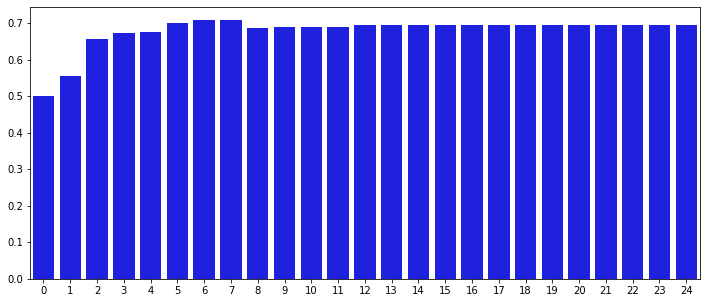

In [ ]:
X= np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.subplots(figsize=(12,5)) # set the size that you'd like (width, height)
clrs = ['blue' ]
sns.barplot(X, MAV,label=X,x="Parameters", y="MAX Validation Accuracy of SVM",palette=clrs)




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


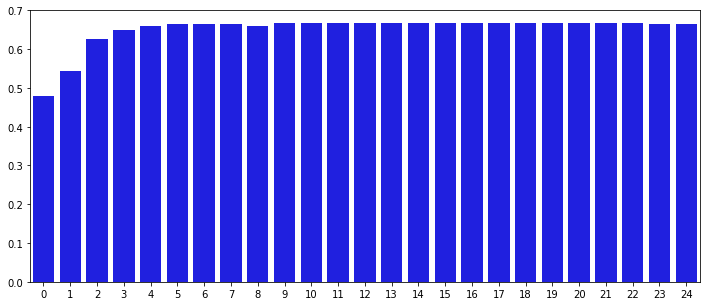

In [ ]:
plt.subplots(figsize=(12,5))
sns.barplot(X, MEV,label=X,x="Parameters", y="Mean of Validation Accuracy of SVM",palette=clrs)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


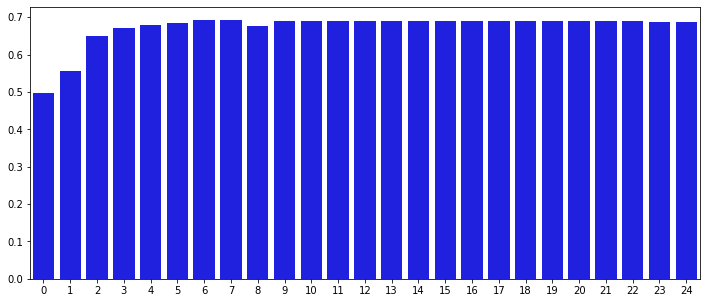

In [ ]:
plt.subplots(figsize=(12,5))
sns.barplot(X, EV,label=X,x="Parameters", y="Mean + SD of Validation Accuracy of SVM",palette=clrs)

In [ ]:
#x_train=Dimensionality_Reduction_Train(X_train)
#x_test=Dimensionality_Reduction_Test(X_test)



#Xtr=x_train[:,K19]
#Xte=x_test[:,K19]
#s=19
#print("SVM classifier")
#SVM(Xtr,Xte,y_test,y_train)
#print("KNN classifier")
#knn(Xtr,Xte,y_test,y_train)
#print("Desition Tree classifier")
#DTree(Xtr,Xte,y_test,y_train)
#print("XGBoost classifier")
#xgbclassif(Xtr,Xte,y_test,y_train)